In [1]:
import glob
import re

from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
from collections import OrderedDict

from utils import Graph

def nano_tip_plot(graph_start, graph_end):
    x = np.arange(graph_start, graph_end + 1, 1)
    
    tip_x = []
    tip_y = []
    
    for i in x:
        tip_x.append(-0.15001 + i)
        tip_x.append(-0.15 + i)
        tip_x.append(0.15 + i)
        tip_x.append(0.15001 + i)
        tip_y.append(0)
        tip_y.append(0.6)
        tip_y.append(0.6)
        tip_y.append(0)
        
    return tip_x, tip_y

def micro_tip_plot(graph_start, graph_end):
    x = np.arange(graph_start, graph_end + 1, 8)
    
    tip_x = []
    tip_y = []
    
    for i in x:
        tip_x.append(-1.001 + i)
        tip_x.append(-1 + i)
        tip_x.append(1 + i)
        tip_x.append(1.001 + i)
        tip_y.append(0)
        tip_y.append(3.5)
        tip_y.append(3.5)
        tip_y.append(0)
        
    return tip_x, tip_y

def conical_tip_plot(graph_start, graph_end):
    x = np.arange(graph_start, graph_end + 1, 5)
    
    tip_x = []
    tip_y = []
    
    for i in x:
        tip_x.append(-0.5 + i)
        tip_x.append(i)
        tip_x.append(0.5 + i)
        tip_y.append(0)
        tip_y.append(0.4)
        tip_y.append(0)
        
    return tip_x, tip_y

def hit_check(x, y, z):
    h = x
    
    if h >= 0.0:
        return True
    
    return False

def mil_hit_check(x, y, z):
    r = (y**2 + z**2)**0.5
    h = x
    
    if (h <= 5e2) and (h <= (-5.05050505 * (r - 1) + 501)):
        return True
    
    return False

The below plots trajectories in LAr near a single tip of $r = 1$ $\mu$m and $h = 3.5$ $\mu$m.

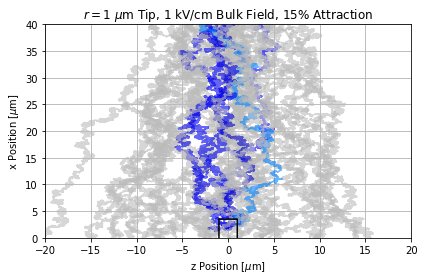

In [6]:
file_tree = {}

for file in glob.glob('tip-attraction/micrometer/single/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False, cutoff=0.01, order=3)

    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))

    hits = 0

    for i in range(group.n):
        x, z = group.x[i], group.z[i]
        if hit_check(x[-1], group.y[i][-1], z[-1]) is True:
            hits += 1
            plt.plot(z, x, color=cm.jet(sum(group.ke[i][-50:])/50), alpha=0.6)
        else:
            plt.plot(z, x, color='#BBBBBB', alpha=0.6)

    x_tips, y_tips = micro_tip_plot(0, 0)
    plt.plot(x_tips, y_tips, color='0.0')

    plt.xlabel('z Position [$\mu$m]')
    plt.ylabel('x Position [$\mu$m]')
    
    attraction = int((hits / group.n) * 1e2)
    plt.title(f'$r = 1$ $\mu$m Tip, $1$ kV/cm Bulk Field, ${attraction}\%$ Attraction')

    plt.xlim(-20, 20)
    plt.ylim(0, 40)

    plt.grid()
    plt.tight_layout()
    plt.show()

The below plots trajectories in LAr near an array of tips of $r = 1$ $\mu$m and $h = 3.5$ $\mu$m.

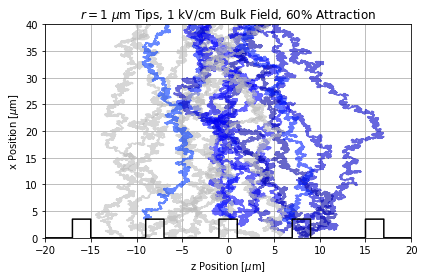

In [7]:
file_tree = {}

for file in glob.glob('tip-attraction/micrometer/array/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False, cutoff=0.01, order=3)

    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))

    hits = 0

    for i in range(group.n):
        x, z = group.x[i], group.z[i]
        if hit_check(x[-1], group.y[i][-1], z[-1]) is True:
            hits += 1
            plt.plot(z, x, color=cm.jet(sum(group.ke[i][-50:])/50), alpha=0.6)
        else:
            plt.plot(z, x, color='#BBBBBB', alpha=0.6)

    x_tips, y_tips = micro_tip_plot(-24, 24)
    plt.plot(x_tips, y_tips, color='0.0')

    plt.xlabel('z Position [$\mu$m]')
    plt.ylabel('x Position [$\mu$m]')
    
    attraction = int((hits / group.n) * 1e2)
    plt.title(f'$r = 1$ $\mu$m Tips, $1$ kV/cm Bulk Field, ${attraction}\%$ Attraction')

    plt.xlim(-20, 20)
    plt.ylim(0, 40)
    
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # plt.savefig('1_um_array_attract.pdf', bbox_inches='tight')

The below plots trajectories in LAr near a single tip of $r = 100$ nm and $h = 600$ nm.

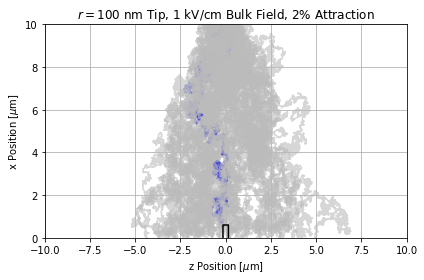

In [10]:
file_tree = {}

for file in glob.glob('tip-attraction/nanometer/single/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False, cutoff=0.01, order=3)

    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))

    hits = 0

    for i in range(group.n):
        x, z = group.x[i], group.z[i]
        if hit_check(x[-1], group.y[i][-1], z[-1]) is True:
            hits += 1
            plt.plot(z, x, color=cm.jet(sum(group.ke[i][-50:])/50), alpha=0.6)
        else:
            plt.plot(z, x, color='#BBBBBB', alpha=0.6)

    x_tips, y_tips = nano_tip_plot(0, 0)
    plt.plot(x_tips, y_tips, color='0.0')

    plt.xlabel('z Position [$\mu$m]')
    plt.ylabel('x Position [$\mu$m]')
    
    attraction = int((hits / group.n) * 1e2)
    plt.title(f'$r = 100$ nm Tip, $1$ kV/cm Bulk Field, ${attraction}\%$ Attraction')

    plt.xlim(-10, 10)
    plt.ylim(0, 10)

    plt.grid()
    plt.tight_layout()
    plt.show()

The below plots trajectories in LAr near an array of tips of $r = 100$ nm and $h = 600$ nm.

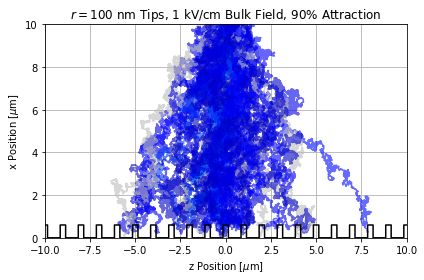

In [11]:
file_tree = {}

for file in glob.glob('tip-attraction/nanometer/array/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False, cutoff=0.01, order=3)

    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))

    hits = 0

    for i in range(group.n):
        x, z = group.x[i], group.z[i]
        if hit_check(x[-1], group.y[i][-1], z[-1]) is True:
            hits += 1
            plt.plot(z, x, color=cm.jet(sum(group.ke[i][-50:])/50), alpha=0.6)
        else:
            plt.plot(z, x, color='#BBBBBB', alpha=0.6)

    x_tips, y_tips = nano_tip_plot(-10, 10)
    plt.plot(x_tips, y_tips, color='0.0')

    plt.xlabel('z Position [$\mu$m]')
    plt.ylabel('x Position [$\mu$m]')
    
    attraction = int((hits / group.n) * 1e2)
    plt.title(f'$r = 100$ nm Tips, $1$ kV/cm Bulk Field, ${attraction}\%$ Attraction')

    plt.xlim(-10, 10)
    plt.ylim(0, 10)

    plt.grid()
    plt.tight_layout()
    plt.show()

The below plots trajectories in LAr near a single tip of $r = 500$ nm and $h = 400$ nm.

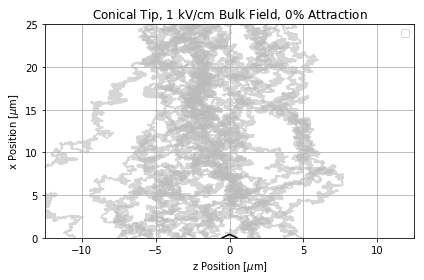

In [12]:
file_tree = {}

for file in glob.glob('tip-attraction/conical/single/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False, cutoff=0.01, order=3)

    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))

    hits = 0

    for i in range(group.n):
        x, z = group.x[i], group.z[i]
        if hit_check(x[-1], group.y[i][-1], z[-1]) is True:
            hits += 1
            plt.plot(z, x, color=cm.jet(sum(group.ke[i][-50:])/50), alpha=0.6, label=int(sum(group.ke[i][-50:])/50))
        else:
            plt.plot(z, x, color='#BBBBBB', alpha=0.6)

    x_tips, y_tips = conical_tip_plot(0, 0)
    plt.plot(x_tips, y_tips, color='0.0')

    plt.xlabel('z Position [$\mu$m]')
    plt.ylabel('x Position [$\mu$m]')
    
    attraction = int((hits / group.n) * 1e2)
    plt.title(f'Conical Tip, $1$ kV/cm Bulk Field, ${attraction}\%$ Attraction')

    plt.xlim(-12.5, 12.5)
    plt.ylim(0, 25)

    plt.grid()
    plt.tight_layout()
    plt.show()

The below plots trajectories in LAr near an array of tips of $r = 500$ nm and $h = 400$ nm.

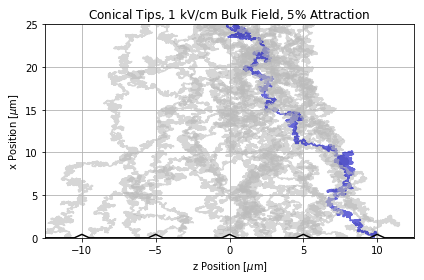

In [13]:
file_tree = {}

for file in glob.glob('tip-attraction/conical/array/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False, cutoff=0.01, order=3)

    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))

    hits = 0

    for i in range(group.n):
        x, z = group.x[i], group.z[i]
        if hit_check(x[-1], group.y[i][-1], z[-1]) is True:
            hits += 1
            plt.plot(z, x, color=cm.jet(sum(group.ke[i][-50:])/50), alpha=0.6, label=int(sum(group.ke[i][-50:])/50))
        else:
            plt.plot(z, x, color='#BBBBBB', alpha=0.6)

    x_tips, y_tips = conical_tip_plot(-15, 15)
    plt.plot(x_tips, y_tips, color='0.0')

    plt.xlabel('z Position [$\mu$m]')
    plt.ylabel('x Position [$\mu$m]')
    
    attraction = int((hits / group.n) * 1e2)
    plt.title(f'Conical Tips, $1$ kV/cm Bulk Field, ${attraction}\%$ Attraction')

    plt.xlim(-12.5, 12.5)
    plt.ylim(0, 25)

    plt.grid()
    plt.tight_layout()
    plt.show()

The below plots trajectories in LAr near a single tip of $r = 1$ $\mu$m and $h = 3.5$ mm.

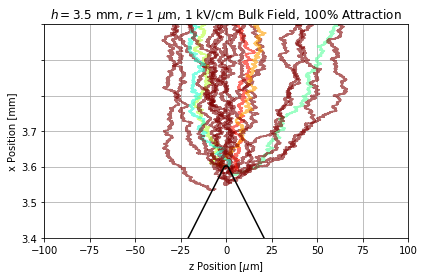

In [16]:
file_tree = {}

for file in glob.glob('tip-attraction/single/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False, cutoff=0.01, order=3)

    ionization_list = [k[-1] for k in group.ionized]
    max_ionized = np.max([k[-1] for k in group.ionized])

    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(12, 18))
    
    hits = 0

    for i in range(group.n):
        x, z = group.x[i], group.z[i]
        if mil_hit_check(x[-1], group.y[i][-1], z[-1]) is True:
            hits += 1
            plt.plot(z, x, color=cm.jet(sum(group.ke[i][-50:])/50), alpha=0.6)
        else:
            plt.plot(z, x, color='#BBBBBB', alpha=0.6)
        
    plt.plot([-100, -1, -0.5, 0, 0.5, 1, 100], [0, 500, 500.866025404, 501, 500.866025404, 500, 0], color='0.0')

    plt.xlabel('z Position [$\mu$m]')
    plt.ylabel('x Position [mm]')
    
    attraction = int((hits / group.n) * 1e2)
    plt.title(f'$h = 3.5$ mm, $r = 1$ $\mu$m, $1$ kV/cm Bulk Field, ${attraction}\%$ Attraction')

    plt.xlim(-100, 100)
    plt.ylim(400, 700)
    plt.gca().set_yticklabels([3.4, 3.5, 3.6, 3.7])
    
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # plt.savefig('gar_tip_electron_paths.pdf', bbox_inches='tight')